In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
import os
# import seaborn as sns
# import scipy.stats as stats
import unittest

In [2]:
#Make sure you ran "Battry_Dataset" Notebook first
pd.set_option("display.max_rows", None, "display.max_columns", None)

%store -r df_battery
#df_battery

In [3]:
import csv
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold 
import math

import sklearn
import statistics as stcs
import scipy.stats as stats


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,scale,MinMaxScaler
from scipy.stats import uniform,expon
from sklearn.model_selection import cross_val_score
from time import time
from sklearn.preprocessing import OneHotEncoder

In [4]:
#One hot encoding (alphebetical order)
ohe = OneHotEncoder()
ACE = df_battery.loc[:,['anode','cathode','electrolyte']]
ACE = ohe.fit_transform(ACE)
ACE = pd.DataFrame(ACE.toarray())

ACE_col_name = ['A1','C1','C2','C3','E1','E2','E3']
for i in range(len(ACE.columns)):
    ACE = ACE.rename({ACE.columns[i]: ACE_col_name[i]}, axis=1) 
    
df_battery = pd.concat([ACE, df_battery],axis=1)

In [5]:
df_battery.columns

Index(['A1', 'C1', 'C2', 'C3', 'E1', 'E2', 'E3', 'cell_id', 'study', 'Cycles ',
       'anode', 'cathode', 'electrolyte', 'Cycle', 'temperature', 'min_soc',
       'max_soc', 'charge_crate', 'discharge_crate', 'capacity_ah',
       'form_factor', 'Start_Time', 'End_Time', 'Test_Time (s)',
       'Min_Current (A)', 'Max_Current (A)', 'Min_Voltage (V)',
       'Max_Voltage (V)', 'Charge_Capacity (Ah)', 'Discharge_Capacity (Ah)',
       'Charge_Energy (Wh)', 'Discharge_Energy (Wh)',
       'Coulombic_Efficiency (%)', 'Voltages (V)',
       'Discharge_Capacities (Ah)'],
      dtype='object')

In [6]:
data = df_battery

np.random.seed(66)
def data_split (data, test_ratio):
    df = pd.DataFrame(data)
    total_row = df.shape[0]

    test_row = round(total_row * test_ratio)

    train_row = total_row - test_row
    
    indices = np.random.permutation(total_row)
    train_indx, test_idx = indices[:train_row], indices[train_row:]
    train,test = df.iloc[train_indx,:], df.iloc[test_idx,:]
    X_test = test[['A1','C1','C2','C3','E1','E2','E3','Cycle','temperature','discharge_crate']]
#    y_test = test[['Charge_Capacity (Ah)']]
    y_test = test[['Discharge_Capacity (Ah)']]
#    y_test = test[['Charge_Energy (Wh)']]
#    y_test = test[['Discharge_Energy (Wh)']]
#    y_test = test[['Coulombic_Efficiency (%)']]
#    y_test = test[['Energy_Efficiency (%)']]
    X_train = train[['A1','C1','C2','C3','E1','E2','E3','Cycle','temperature','discharge_crate']]
#    y_train = train[['Charge_Capacity (Ah)']]
    y_train = train[['Discharge_Capacity (Ah)']]
#    y_train = train[['Charge_Energy (Wh)']]
#    y_train = train[['Discharge_Energy (Wh)']]
#    y_train = train[['Coulombic_Efficiency (%)']]
#    y_train = train[['Energy_Efficiency (%)']]
    return train,test,X_train,y_train,X_test,y_test
    
train,test,X_train,y_train,X_test,y_test = data_split(data,0.2)
#print(X_train)

In [7]:
#k-fold cross validation
kf = KFold(n_splits=10,random_state =66,shuffle= True)
#print(X_test,y_test,X_train,y_train)

In [8]:
#Data scaling, algorithms that use distance measures are affected by the scale of numerical input variables
#Standardization assumes that your observations fit a Guassian distribution with well-behaved mean and standard deviation
scaler = StandardScaler(with_mean=True,with_std=True)
print(scaler.fit(X_test))
print(scaler.mean_)

X_test = pd.DataFrame(scaler.transform(X_test))

print(scaler.fit(X_train))
print(scaler.mean_)
X_train = pd.DataFrame(scaler.transform(X_train))

StandardScaler()
[  1.         0.296875   0.34375    0.359375   0.296875   0.34375
   0.359375 292.1875    25.3125     1.4375  ]
StandardScaler()
[1.00000000e+00 3.94531250e-01 2.65625000e-01 3.39843750e-01
 3.94531250e-01 2.65625000e-01 3.39843750e-01 2.70703125e+02
 2.53125000e+01 1.45703125e+00]


In [9]:
#tuning hyperparameters
rand_para = {'n_neighbors':range(1,201)}

svm_model =KNeighborsRegressor()
n_iteration = 200
Scoring = ['explained_variance','neg_mean_squared_error',"r2"]
random_search = RandomizedSearchCV(svm_model,
                                   param_distributions=rand_para,
                                   cv =5,
                                   scoring=Scoring,
                                   error_score=0,
                                   random_state=66,
                                   return_train_score=True,
                                   n_jobs=-1,
                                   n_iter=n_iteration,
                                   verbose=10,
                                   refit=False)



random_search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5; 1/200] START n_neighbors=1.............................................
[CV 1/5; 1/200] END n_neighbors=1; explained_variance: (train=0.674, test=0.322) neg_mean_squared_error: (train=-0.265, test=-0.462) r2: (train=0.672, test=0.278) total time=   0.0s
[CV 4/5; 2/200] START n_neighbors=2.............................................
[CV 4/5; 2/200] END n_neighbors=2; explained_variance: (train=0.708, test=0.735) neg_mean_squared_error: (train=-0.219, test=-0.230) r2: (train=0.708, test=0.735) total time=   0.0s
[CV 5/5; 2/200] START n_neighbors=2.............................................
[CV 5/5; 2/200] END n_neighbors=2; explained_variance: (train=0.745, test=0.444) neg_mean_squared_error: (train=-0.195, test=-0.443) r2: (train=0.745, test=0.444) total time=   0.0s
[CV 3/5; 3/200] START n_neighbors=3.............................................
[CV 3/5; 3/200] END n_neighbors=3; explained_variance: (train=0.76

[CV 1/5; 21/200] END n_neighbors=21; explained_variance: (train=0.657, test=0.544) neg_mean_squared_error: (train=-0.278, test=-0.327) r2: (train=0.656, test=0.489) total time=   0.0s
[CV 2/5; 21/200] START n_neighbors=21...........................................
[CV 2/5; 21/200] END n_neighbors=21; explained_variance: (train=0.648, test=0.519) neg_mean_squared_error: (train=-0.277, test=-0.352) r2: (train=0.648, test=0.514) total time=   0.0s
[CV 3/5; 21/200] START n_neighbors=21...........................................
[CV 3/5; 21/200] END n_neighbors=21; explained_variance: (train=0.646, test=0.557) neg_mean_squared_error: (train=-0.270, test=-0.372) r2: (train=0.645, test=0.551) total time=   0.0s
[CV 4/5; 21/200] START n_neighbors=21...........................................
[CV 4/5; 21/200] END n_neighbors=21; explained_variance: (train=0.600, test=0.751) neg_mean_squared_error: (train=-0.300, test=-0.220) r2: (train=0.599, test=0.748) total time=   0.0s
[CV 3/5; 27/200] STAR

RandomizedSearchCV(cv=5, error_score=0, estimator=KNeighborsRegressor(),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'n_neighbors': range(1, 201)},
                   random_state=66, refit=False, return_train_score=True,
                   scoring=['explained_variance', 'neg_mean_squared_error',
                            'r2'],
                   verbose=10)

In [10]:
#Test-set Validation
KNN_model = KNeighborsRegressor(n_neighbors = 10)
np.random.seed(66)
KNN_model.fit(X_train,y_train)
y_predict = KNN_model.predict(X_test)
#print(y_predict)

In [11]:
#calculate RMSE
MSE_test = mean_squared_error(y_predict, y_test)
RMSE_test = math.sqrt(MSE_test)
print(RMSE_test)

0.5291048819409532


In [12]:
##Train-error
np.random.seed(66)
KNN_model_train = KNeighborsRegressor(n_neighbors=10)

#split train, validate dataset
for train_index, test_index in kf.split(X_train):
    
    X_training, X_validate = X_train.iloc[train_index], X_train.iloc[test_index]
    y_training, y_validate = y_train.iloc[train_index], y_train.iloc[test_index]
    
    #train KNN model    
    np.random.seed(66)
    KNN_model_train.fit(X_training,y_training)
    y_train_predicted = KNN_model_train.predict(X_validate)
    
#calculate train RMSE    
MSE_train = mean_squared_error(y_train_predicted, y_validate)
RMSE_train = math.sqrt(MSE_train)
print(RMSE_train)

0.6377657347333738


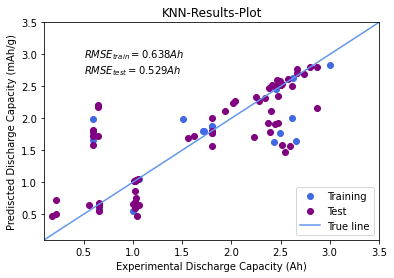

[CV 3/5; 94/200] START n_neighbors=94...........................................
[CV 3/5; 94/200] END n_neighbors=94; explained_variance: (train=0.518, test=0.457) neg_mean_squared_error: (train=-0.388, test=-0.456) r2: (train=0.490, test=0.450) total time=   0.0s
[CV 4/5; 94/200] START n_neighbors=94...........................................
[CV 4/5; 94/200] END n_neighbors=94; explained_variance: (train=0.463, test=0.567) neg_mean_squared_error: (train=-0.412, test=-0.384) r2: (train=0.450, test=0.559) total time=   0.0s
[CV 5/5; 94/200] START n_neighbors=94...........................................
[CV 5/5; 94/200] END n_neighbors=94; explained_variance: (train=0.516, test=0.493) neg_mean_squared_error: (train=-0.394, test=-0.432) r2: (train=0.486, test=0.458) total time=   0.0s
[CV 1/5; 95/200] START n_neighbors=95...........................................
[CV 1/5; 95/200] END n_neighbors=95; explained_variance: (train=0.500, test=0.509) neg_mean_squared_error: (train=-0.418, te

[CV 2/5; 99/200] START n_neighbors=99...........................................
[CV 2/5; 99/200] END n_neighbors=99; explained_variance: (train=0.493, test=0.430) neg_mean_squared_error: (train=-0.416, test=-0.419) r2: (train=0.472, test=0.421) total time=   0.0s
[CV 3/5; 99/200] START n_neighbors=99...........................................
[CV 3/5; 99/200] END n_neighbors=99; explained_variance: (train=0.485, test=0.428) neg_mean_squared_error: (train=-0.411, test=-0.479) r2: (train=0.460, test=0.422) total time=   0.0s
[CV 4/5; 99/200] START n_neighbors=99...........................................
[CV 4/5; 99/200] END n_neighbors=99; explained_variance: (train=0.433, test=0.523) neg_mean_squared_error: (train=-0.433, test=-0.421) r2: (train=0.422, test=0.517) total time=   0.0s
[CV 5/5; 99/200] START n_neighbors=99...........................................
[CV 5/5; 99/200] END n_neighbors=99; explained_variance: (train=0.488, test=0.468) neg_mean_squared_error: (train=-0.412, te

[CV 4/5; 104/200] START n_neighbors=104.........................................
[CV 4/5; 104/200] END n_neighbors=104; explained_variance: (train=0.403, test=0.478) neg_mean_squared_error: (train=-0.455, test=-0.458) r2: (train=0.393, test=0.474) total time=   0.0s
[CV 5/5; 104/200] START n_neighbors=104.........................................
[CV 5/5; 104/200] END n_neighbors=104; explained_variance: (train=0.459, test=0.444) neg_mean_squared_error: (train=-0.430, test=-0.473) r2: (train=0.439, test=0.407) total time=   0.0s
[CV 2/5; 116/200] START n_neighbors=116.........................................
[CV 2/5; 116/200] END n_neighbors=116; explained_variance: (train=0.387, test=0.350) neg_mean_squared_error: (train=-0.491, test=-0.472) r2: (train=0.377, test=0.347) total time=   0.0s
[CV 3/5; 116/200] START n_neighbors=116.........................................
[CV 3/5; 116/200] END n_neighbors=116; explained_variance: (train=0.377, test=0.343) neg_mean_squared_error: (train=-0

[CV 2/5; 100/200] START n_neighbors=100.........................................
[CV 2/5; 100/200] END n_neighbors=100; explained_variance: (train=0.486, test=0.424) neg_mean_squared_error: (train=-0.420, test=-0.423) r2: (train=0.466, test=0.415) total time=   0.0s
[CV 3/5; 100/200] START n_neighbors=100.........................................
[CV 3/5; 100/200] END n_neighbors=100; explained_variance: (train=0.480, test=0.424) neg_mean_squared_error: (train=-0.414, test=-0.482) r2: (train=0.455, test=0.418) total time=   0.0s
[CV 4/5; 100/200] START n_neighbors=100.........................................
[CV 4/5; 100/200] END n_neighbors=100; explained_variance: (train=0.428, test=0.516) neg_mean_squared_error: (train=-0.437, test=-0.426) r2: (train=0.417, test=0.510) total time=   0.0s
[CV 5/5; 100/200] START n_neighbors=100.........................................
[CV 5/5; 100/200] END n_neighbors=100; explained_variance: (train=0.482, test=0.463) neg_mean_squared_error: (train=-0

In [13]:
import numpy
import matplotlib.pyplot as plt

plt.axis([0.1,3.5,0.1,3.5])
plt.scatter(x = y_validate, y = y_train_predicted, c='royalblue',label='Training')
plt.scatter(x = y_test, y = y_predict, c='purple',label='Test')
plt.plot([0,5],[0,5],label ='True line',c='cornflowerblue')
plt.legend(loc='lower right')
plt.title(label='KNN-Results-Plot')

plt.xlabel(r'Experimental Discharge Capacity (Ah)')
plt.ylabel(r'Prediscted Discharge Capacity (mAh/g)')
plt.text(0.5, 2.5, r'$RMSE_{train}=0.638Ah$'+'\n'+r'$RMSE_{test}=0.529Ah$' +"\n")
plt.savefig('KNN-Predicted-vs-test.png',dpi=600)
plt.show()
